### Settings

In [584]:
USE_MINUTES = True

USE_ROLLING_WINDOW = True
ROLLING_WINDOW_SIZE = 10
USE_MEAN = True # Otherwise Median will be used

### Imports

In [585]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

from oak_cli.utils.logging import logger
from oak_cli.evaluation.machine.main import EVALUATION_CSV

### Error Handing & Checking

In [586]:
if not EVALUATION_CSV.exists():
    logger.error(f"{EVALUATION_CSV} does not exist yet!")
    sys.exit(1)

### Common Graph Configuration

In [587]:
# Load the CSV file into a DataFrame
df = pd.read_csv(EVALUATION_CSV)

df.set_index("Time since experiment start", inplace=True)

if USE_MINUTES:
    df.index = df.index / 60

### Common Graph Styling

In [588]:
sns.set_style("whitegrid")

# Graphs Drawing

### 0-100 % Resources

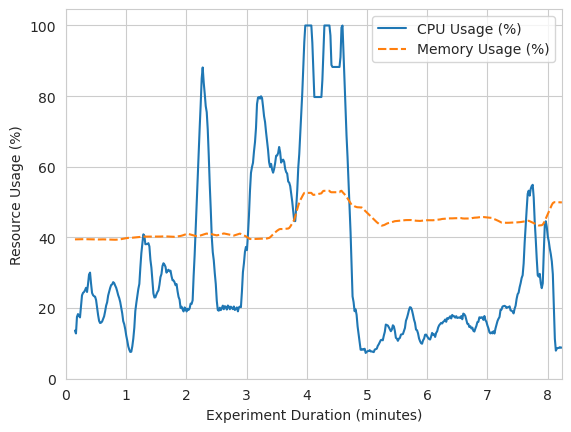

In [589]:
if USE_ROLLING_WINDOW:
    tmp = df[['CPU Usage (%)', 'Memory Usage (%)']].rolling(window=ROLLING_WINDOW_SIZE)
    df[['CPU Usage (%)', 'Memory Usage (%)']] = tmp.mean() if USE_MEAN else tmp.median()

#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.lineplot(data=df[["CPU Usage (%)", "Memory Usage (%)"]])

#plt.title("Time Series of CPU and Memory Usage")
plt.xlabel("Experiment Duration " + "(minutes)" if USE_MINUTES else "(seconds)")
plt.ylabel("Resource Usage (%)")

plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

### Disk Space Changes

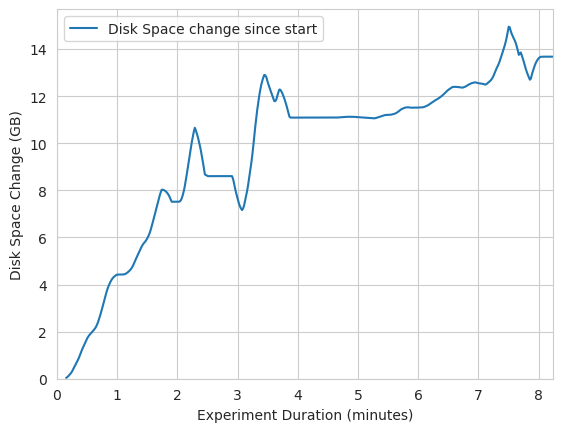

In [590]:
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

if USE_ROLLING_WINDOW:
    tmp = df[["Disk Space change since start"]].rolling(window=ROLLING_WINDOW_SIZE)
    df[["Disk Space change since start"]] = tmp.mean() if USE_MEAN else tmp.median()


df[["Disk Space change since start"]] = df[["Disk Space change since start"]] / 1024
sns.lineplot(data=df[["Disk Space change since start"]])
plt.xlabel("Experiment Duration " + "(minutes)" if USE_MINUTES else "(seconds)")
plt.ylabel("Disk Space Change (GB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# if USE_ROLLING_WINDOW:
#     tmp = df[["Disk Space change since start"]].rolling(window=ROLLING_WINDOW_SIZE)
#     df[["Disk Space change since start"]] = tmp.mean() if USE_MEAN else tmp.median()


#df[["Disk Space change since start"]] = df[["Disk Space change since start"]] / 1024
sns.lineplot(data=df[["Next Disk diff"]])
plt.xlabel("Experiment Duration " + "(minutes)" if USE_MINUTES else "(seconds)")
plt.ylabel("Disk Space Change (MB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

### Network

### Since Start

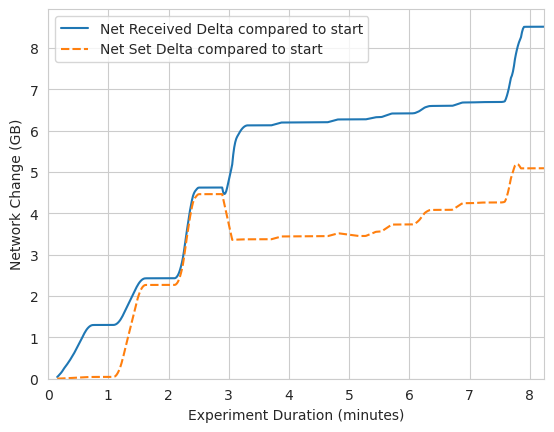

In [591]:
if USE_ROLLING_WINDOW:
    tmp = df[["Net Received Delta compared to start", "Net Set Delta compared to start"]].rolling(window=ROLLING_WINDOW_SIZE)
    df[["Net Received Delta compared to start", "Net Set Delta compared to start"]] = tmp.mean() if USE_MEAN else tmp.median()

sns.lineplot(data=df[["Net Received Delta compared to start", "Net Set Delta compared to start"]] / 1024)
plt.xlabel("Experiment Duration " + "(minutes)" if USE_MINUTES else "(seconds)")
plt.ylabel("Network Change (GB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

### Network compared: current vs last

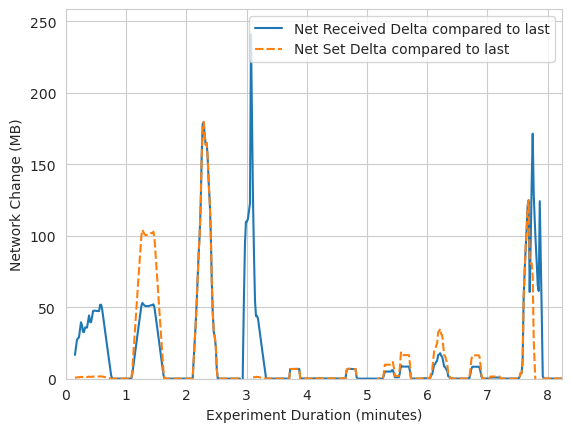

In [592]:
if USE_ROLLING_WINDOW:
    tmp = df[["Net Received Delta compared to last", "Net Set Delta compared to last"]].rolling(window=ROLLING_WINDOW_SIZE)
    df[["Net Received Delta compared to last", "Net Set Delta compared to last"]] = tmp.mean() if USE_MEAN else tmp.median()

sns.lineplot(data=df[["Net Received Delta compared to last", "Net Set Delta compared to last"]])
plt.xlabel("Experiment Duration " + "(minutes)" if USE_MINUTES else "(seconds)")
plt.ylabel("Network Change (MB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()